In [53]:
import pandas as pd
import plotly.express as px
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

carros = pd.read_csv('../vehicles.csv')
df_carros = carros.copy()

In [54]:
print(carros.head(15))


    Unnamed: 0  price  model_year                     model  condition  \
0            0   9400      2011.0                    bmw x5       good   
1            2   5500      2013.0            hyundai sonata   like new   
2            4  14900      2017.0              chrysler 200  excellent   
3            5  14990      2014.0              chrysler 300  excellent   
4            6  12990      2015.0              toyota camry  excellent   
5            7  15990      2013.0               honda pilot  excellent   
6            8  11500      2012.0               kia sorento  excellent   
7           10  19500      2011.0  chevrolet silverado 1500  excellent   
8           11   8990      2012.0              honda accord  excellent   
9           12  18990      2012.0                  ram 1500  excellent   
10          13  16500      2018.0            hyundai sonata  excellent   
11          14  12990      2009.0                 gmc yukon  excellent   
12          16  14990      2010.0     

In [55]:
print(carros.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31663 entries, 0 to 31662
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    31663 non-null  int64  
 1   price         31663 non-null  int64  
 2   model_year    31663 non-null  float64
 3   model         31663 non-null  object 
 4   condition     31663 non-null  object 
 5   cylinders     31663 non-null  float64
 6   fuel          31663 non-null  object 
 7   odometer      31663 non-null  float64
 8   transmission  31663 non-null  object 
 9   type          31663 non-null  object 
 10  paint_color   31663 non-null  object 
 11  is_4wd        31663 non-null  float64
 12  date_posted   31663 non-null  object 
 13  days_listed   31663 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 3.4+ MB
None


In [56]:
print(carros.describe())

         Unnamed: 0          price    model_year     cylinders       odometer  \
count  31663.000000   31663.000000  31663.000000  31663.000000   31663.000000   
mean   25834.731011   12481.025013   2009.846003      6.133152  120039.658087   
std    14921.635311    9323.029005      5.795428      1.635183   59071.081793   
min        0.000000    2550.000000   1908.000000      3.000000   20050.000000   
25%    12913.000000    5900.000000   2007.000000      4.000000   78244.000000   
50%    25995.000000    9950.000000   2011.000000      6.000000  115526.000000   
75%    38764.500000   16900.000000   2014.000000      8.000000  154436.000000   
max    51523.000000  375000.000000   2019.000000     12.000000  990000.000000   

             is_4wd   days_listed  
count  31663.000000  31663.000000  
mean       0.506711     39.703124  
std        0.499963     28.173194  
min        0.000000      0.000000  
25%        0.000000     19.000000  
50%        1.000000     33.000000  
75%        1.00000

In [57]:
# Verificação de linhas duplicadas e valores nulos

print(carros.duplicated().sum())
print()
print(carros.isna().sum())

0

Unnamed: 0      0
price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


In [58]:
# Analise dos valores nulos
# Coluna 'is_4wd' carros com tração nas 4 rodas - subtituição dos nulos para 0, onde 0 = não e 1 igual a sim
# Coluna paint_color - subtituição dos nulos para 'other'(outro)

df_carros['is_4wd'].fillna(0, inplace=True)
df_carros['paint_color'].fillna('other', inplace=True)

print(df_carros['is_4wd'].value_counts())
print(df_carros['paint_color'].value_counts())

is_4wd
1.0    16044
0.0    15619
Name: count, dtype: int64
paint_color
white     6320
other     5674
black     4711
silver    3844
grey      3133
red       2749
blue      2702
green      741
brown      736
custom     702
yellow     151
orange     145
purple      55
Name: count, dtype: int64


C:\Users\carlo\AppData\Local\Temp\ipykernel_20856\177512510.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\carlo\AppData\Local\Temp\ipykernel_20856\177512510.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [59]:
# Nulos sem tratamento
# Os casos restantes me parecem complicados de obter a informação com qualquer que seja fonte original
# Essas variáveis alteram o preço de venda, sendo informações importantes para substituir com a média,mediana,etc.

print(df_carros.isna().sum())

Unnamed: 0      0
price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


In [60]:
# Excluindo os valores nulos
# Indo de 51523 objetos para 36419 - 70,68%

df_carros = df_carros.dropna()

print(df_carros.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31663 entries, 0 to 31662
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    31663 non-null  int64  
 1   price         31663 non-null  int64  
 2   model_year    31663 non-null  float64
 3   model         31663 non-null  object 
 4   condition     31663 non-null  object 
 5   cylinders     31663 non-null  float64
 6   fuel          31663 non-null  object 
 7   odometer      31663 non-null  float64
 8   transmission  31663 non-null  object 
 9   type          31663 non-null  object 
 10  paint_color   31663 non-null  object 
 11  is_4wd        31663 non-null  float64
 12  date_posted   31663 non-null  object 
 13  days_listed   31663 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 3.4+ MB
None


In [61]:
# Histograma odometer
# Quantidade de carros por kilometragem rodada

fig = px.histogram(df_carros, x='odometer')
fig.show()

# Possível verificar alguns valores muito altos, mas é possível existir carros que rodaram muito ao longo dos anos

In [62]:
print(df_carros.describe())

# analisando outliers
# IQR = Q3 - Q1 | Direita = 1,5 * IQR - Q1 | Esquerda = Q3 + 1,5 * IQR
# calculo do IQR price
# price_Q1E = (1.5*(16900-5000) - 5000)
# price_Q3D = (16900 + 1.5*(16900-5000))

q1 = df_carros['price'].quantile(0.25)
q3 = df_carros['price'].quantile(0.75)
iqr = q3 - q1

price_Q1E = 1.5*iqr - q1 
price_Q3D = q3 + 1.5*iqr

# # outliers price
price_outliers = (f"price <= {price_Q1E} or price >= {price_Q3D}") # formato para utilizar query

# # calculo do IQR odometer
odom_Q1E = (1.5*(155000-69854) - 69854)
odom_Q3D = (155000 + 1.5*(155000-69854))

# # outliers odometer
odom_outliers = (f"odometer < {odom_Q1E} or odometer > {odom_Q3D}")

print(price_Q1E) # check de calculo
print(price_Q3D) # check de calculo
print()
print(odom_Q1E)
print(odom_Q3D)

         Unnamed: 0          price    model_year     cylinders       odometer  \
count  31663.000000   31663.000000  31663.000000  31663.000000   31663.000000   
mean   25834.731011   12481.025013   2009.846003      6.133152  120039.658087   
std    14921.635311    9323.029005      5.795428      1.635183   59071.081793   
min        0.000000    2550.000000   1908.000000      3.000000   20050.000000   
25%    12913.000000    5900.000000   2007.000000      4.000000   78244.000000   
50%    25995.000000    9950.000000   2011.000000      6.000000  115526.000000   
75%    38764.500000   16900.000000   2014.000000      8.000000  154436.000000   
max    51523.000000  375000.000000   2019.000000     12.000000  990000.000000   

             is_4wd   days_listed  
count  31663.000000  31663.000000  
mean       0.506711     39.703124  
std        0.499963     28.173194  
min        0.000000      0.000000  
25%        0.000000     19.000000  
50%        1.000000     33.000000  
75%        1.00000

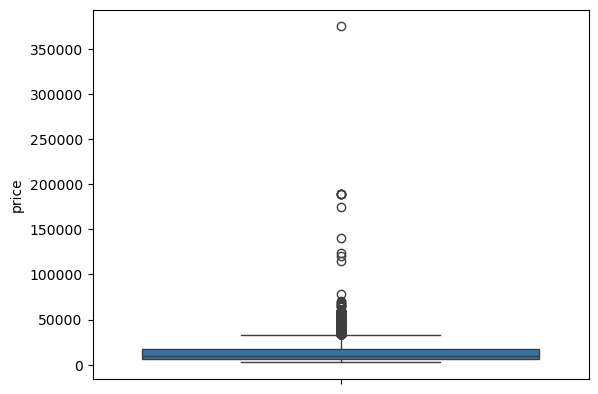

In [63]:
# Verificação visual de possíveis outliers na coluna price

sns.boxplot(df_carros['price'])
plt.show()

In [64]:
# Verificação da quantidade e valores dos dataframe
# price - preços abaixo de 2,500 serão considerados anormais por serem muito baixos
# checagem de minimo para ser um outlier

filtro_price_out = df_carros.query(price_outliers)
# filtro_price_out2 = df_carros[(df_carros['price'] < price_Q1E) | (df_carros['price'] > price_Q3D)] # teste com o segundo método de filtragem

#print(filtro_price_out.head())
#print(filtro_price_out.count())

min_price_out = filtro_price_out[filtro_price_out['price'] < 2500]
print(min_price_out.count())
print(min_price_out['model_year'].value_counts(ascending=False))

Unnamed: 0      0
price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64
Series([], Name: count, dtype: int64)


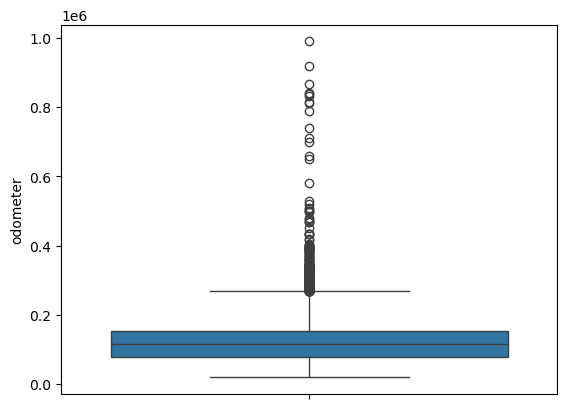

In [65]:
# Verificação visual de possíveis outliers na coluna odometer

sns.boxplot(df_carros['odometer'])
plt.show()

In [66]:
# Verificação da quantidade e valores dos dataframe
# odometro - kilometragem abaixo de 20,000 km rodados serão considerados anormais por serem muito baixas
# checagem da média do df e minimo para ser um outlier

filtro_odom_out = df_carros.query(odom_outliers)

# print(filtro_odom_out.head())
# print(filtro_odom_out.count())

min_odom_out = filtro_odom_out[filtro_odom_out['odometer'] < 20000]
print(df_carros['odometer'].mean())
print(min_odom_out['odometer'].count())
print(min_odom_out['model_year'].value_counts(ascending=False))

120039.65808672583
0
Series([], Name: count, dtype: int64)


In [67]:
# Verificação da quantidade e valores dos dataframe
# odometro - kilometragem acima de 155,000 km rodados serão considerados anormais por serem muito altas
# checagem da média do df e 'maximo' para ser um outlier

filtro_odom_out = df_carros.query(odom_outliers)

# print(filtro_odom_out.head())
# print(filtro_odom_out.count())

max_odom_out = filtro_odom_out[filtro_odom_out['odometer'] > 155000]
print(df_carros['odometer'].mean())
print(max_odom_out['odometer'].count())
print(max_odom_out['model_year'].value_counts(ascending=False))

120039.65808672583
306
model_year
2004.0    29
1999.0    28
2006.0    26
2003.0    23
2001.0    21
2005.0    20
2008.0    18
2000.0    16
2002.0    15
2007.0    14
2012.0    11
1997.0    11
1998.0     9
2010.0     8
2011.0     8
1996.0     8
2009.0     7
2014.0     6
2013.0     6
1993.0     5
2015.0     5
1994.0     3
1995.0     3
1990.0     2
2018.0     1
2016.0     1
1986.0     1
1992.0     1
Name: count, dtype: int64


In [68]:
# Verificação da quantidade e valores dos dataframe que estão de acordo com a regra de verificação dos outliers
# Coluna price
# O dataframe ficaria muito prejudicado utilizando somente a regra dos outliers

price_main = df_carros[(df_carros['price'] > price_Q1E) & (df_carros['price'] < price_Q3D)]

#print(price_main)
#print(price_main.count())

In [69]:
# Verificação da quantidade e valores dos dataframe que estão de acordo com a regra de verificação dos outliers
# Coluna odometer
# O dataframe ficaria muito prejudicado utilizando somente a regra dos outliers

odom_main = df_carros[(df_carros['odometer'] > odom_Q1E) & (df_carros['odometer'] < odom_Q3D)]

# print(odom_main)
# print(odom_main.count())

In [70]:
# Seleção da base de dados final para analises
'''Premissas:
1- Nulos excluidos das colunas: model_year ; cylinders ; odometer ;
2- Casos da coluna price < 2500 não serão considerados;
3- Casos da coluna odometer < 20000 não serão considerados;
''' 

main_carros = df_carros[(df_carros['price'] > 2500) & (df_carros['odometer'] > 20000)]

print(main_carros.describe())

         Unnamed: 0          price    model_year     cylinders       odometer  \
count  31663.000000   31663.000000  31663.000000  31663.000000   31663.000000   
mean   25834.731011   12481.025013   2009.846003      6.133152  120039.658087   
std    14921.635311    9323.029005      5.795428      1.635183   59071.081793   
min        0.000000    2550.000000   1908.000000      3.000000   20050.000000   
25%    12913.000000    5900.000000   2007.000000      4.000000   78244.000000   
50%    25995.000000    9950.000000   2011.000000      6.000000  115526.000000   
75%    38764.500000   16900.000000   2014.000000      8.000000  154436.000000   
max    51523.000000  375000.000000   2019.000000     12.000000  990000.000000   

             is_4wd   days_listed  
count  31663.000000  31663.000000  
mean       0.506711     39.703124  
std        0.499963     28.173194  
min        0.000000      0.000000  
25%        0.000000     19.000000  
50%        1.000000     33.000000  
75%        1.00000

In [71]:

odom_hist = px.histogram(main_carros, x='odometer')
odom_hist.show()

In [72]:
ymodel_hist = px.histogram(main_carros, x='model_year')
ymodel_hist.show()

In [73]:
# model_main_carros = main_carros['model'].value_counts(ascending=False).reset_index()
model_hist = px.bar(main_carros, x='model')
# model_hist = px.bar(model_main_carros, x='model')
model_hist.show()


In [74]:
model_scatter = px.scatter(main_carros, x='model', y='price')
model_scatter.show()

In [75]:
ymodel_scatter = px.scatter(main_carros, x='model_year', y='price')
ymodel_scatter.show()

In [76]:
odom_scatter = px.scatter(main_carros, x='odometer', y='price')
odom_scatter.show()

In [77]:
condi_scatter = px.scatter(main_carros, x='condition', y='model_year')
condi_scatter.show()

In [78]:
main_carros.to_csv('../vehicles1.csv')